In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets
data = datasets.load_boston()

In [2]:
print data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
print data.feature_names
print data.data[0]
print data.target[0]

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]
24.0


In [4]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
targets = pd.DataFrame(data.target, columns=["MEDV"])

# Take a look at the first few rows
print df.head()
print targets.head()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [5]:
df['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [7]:
targets['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [9]:
import statsmodels.api as sm

x = df["RM"]
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          3.74e-256
Time:                        15:02:33   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000         3.548     3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

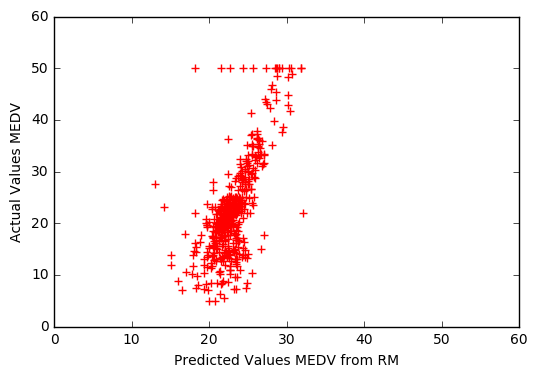

MSE: 270070.558471


In [13]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values MEDV from RM")
plt.xlim(0,60)
plt.ylim(0,60)
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model

In [16]:
## With a constant
x = df["RM"]
x = sm.add_constant(x)
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           2.49e-74
Time:                        15:13:13   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000       -39.877   -29.465
RM             9.1021      0.419     21.722      0.000         8.279     9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

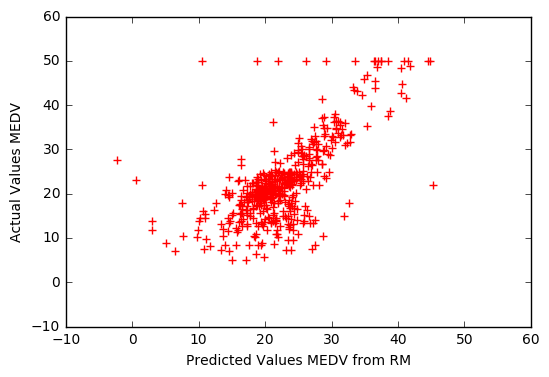

MSE: 20654.4162188


In [18]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values MEDV from RM")
plt.xlim(-10,60)
plt.ylim(-10,60)
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model

In [19]:

x = df[["LSTAT"]]
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     410.9
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           2.71e-67
Time:                        15:21:27   Log-Likelihood:                -2182.4
No. Observations:                 506   AIC:                             4367.
Df Residuals:                     505   BIC:                             4371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
LSTAT          1.1221      0.055     20.271      0.000         1.013     1.231
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.051
Skew:                           0.112   Prob(JB):                        0.591
Kurtosis:                       3.009   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

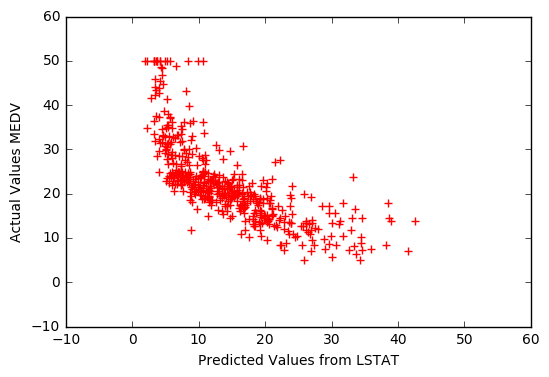

MSE: 134427.133958


In [21]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from LSTAT")
plt.ylabel("Actual Values MEDV")
plt.xlim(-10,60)
plt.ylim(-10,60)
plt.show()
print "MSE:", model.mse_model

In [22]:
x = df[["RM", "LSTAT"]]
y = targets["MEDV"]

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     4637.
Date:                Tue, 11 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:23:20   Log-Likelihood:                -1582.9
No. Observations:                 506   AIC:                             3170.
Df Residuals:                     504   BIC:                             3178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000         4.769     5.045
LSTAT         -0.6557      0.031    -21.458      0.000        -0.716    -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

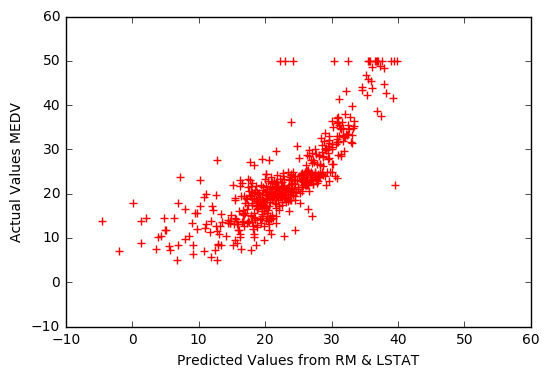

MSE: 142090.70278


In [23]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM & LSTAT")
plt.ylabel("Actual Values MEDV")
plt.xlim(-10,60)
plt.ylim(-10,60)
plt.show()
print "MSE:", model.mse_model

In [24]:
x = df[["RM", "LSTAT"]]
y = targets["MEDV"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          7.01e-112
Time:                        15:27:21   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.669        -7.592     4.875
RM             5.0948      0.444     11.463      0.000         4.222     5.968
LSTAT         -0.6424      0.044    -14.689      0.000        -0.728    -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

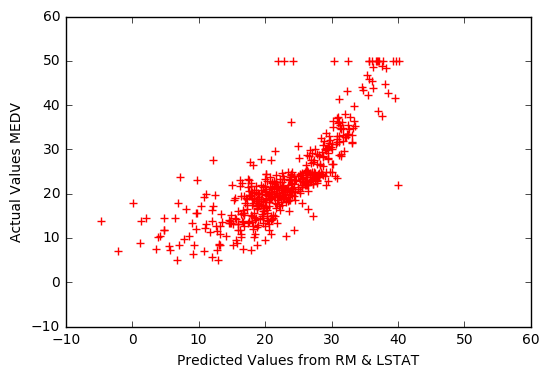

MSE: 13638.4931069


In [25]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM & LSTAT")
plt.ylabel("Actual Values MEDV")
plt.xlim(-10,60)
plt.ylim(-10,60)
plt.show()
print "MSE:", model.mse_model

In [26]:
x = df
y = targets["MEDV"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          6.95e-135
Time:                        15:31:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000        26.462    46.520
CRIM          -0.1072      0.033     -3.276      0.001        -0.171    -0.043
ZN             0.0464      0.014      3.380      0.001         0.019     0.073
INDUS          0.0209      0.061      0.339      0.735        -0.100     0.142
CHAS           2.6886      0.862      3.120      0.002         0.996     4.381
NOX          -17.7958      3.821     -4.658      0.000       -25.302   -10.289
RM             3.8048      0.418      9.102      0.000         2.983     4.626
AGE            0.0008      0.013      0.057      0.955        -0.025     0.027
DIS           -1.4758      0.199     -7.398      0.000        -1.868    -1.084
RAD            0.3057      0.066      4.608      0.000         0.175     0.436
TAX           -0.0123      0.004     -3.278      0.001        -0.020    -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000        -1.211    -0.696
B              0.0094      0.003      3.500      0.001         0.004     0.015
LSTAT         -0.5255      0.051    -10.366      0.000        -0.625    -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

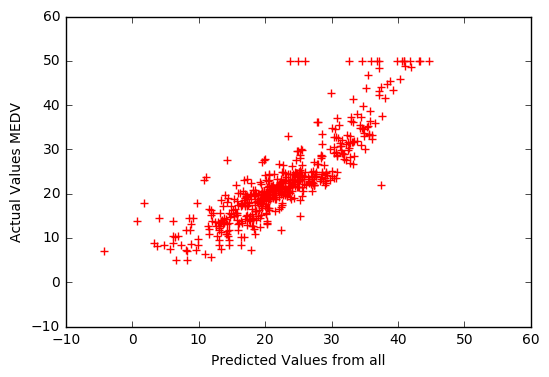

MSE: 2433.53993314


In [27]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from all")
plt.ylabel("Actual Values MEDV")
plt.xlim(-10,60)
plt.ylim(-10,60)
plt.show()
print "MSE:", model.mse_model

In [29]:
import patsy

# First let's add the targets to our data frame
df["MEDV"] = targets["MEDV"]

y, x = patsy.dmatrices("MEDV ~ RM + LSTAT", data=df)
print x[0:5, :]
print y[0:5, :]

[[ 1.     6.575  4.98 ]
 [ 1.     6.421  9.14 ]
 [ 1.     7.185  4.03 ]
 [ 1.     6.998  2.94 ]
 [ 1.     7.147  5.33 ]]
[[ 24. ]
 [ 21.6]
 [ 34.7]
 [ 33.4]
 [ 36.2]]


In [30]:
y, x = patsy.dmatrices("MEDV ~ LSTAT + I(LSTAT**2)", data=df)
print X[0:5, :]

[[ 1.     6.575  4.98 ]
 [ 1.     6.421  9.14 ]
 [ 1.     7.185  4.03 ]
 [ 1.     6.998  2.94 ]
 [ 1.     7.147  5.33 ]]


In [31]:
from patsy import dmatrix, demo_data

data = demo_data("a", nlevels=4)
print data
dmatrix("a", data)

{'a': ['a1', 'a2', 'a3', 'a4', 'a1', 'a2', 'a3', 'a4']}


DesignMatrix with shape (8, 4)
  Intercept  a[T.a2]  a[T.a3]  a[T.a4]
          1        0        0        0
          1        1        0        0
          1        0        1        0
          1        0        0        1
          1        0        0        0
          1        1        0        0
          1        0        1        0
          1        0        0        1
  Terms:
    'Intercept' (column 0)
    'a' (columns 1:4)

In [33]:
y, x = patsy.dmatrices("MEDV ~ RM + LSTAT", data=df)
crim_indus_model = sm.OLS(y, x).fit()
predictions = crim_indus_model.predict(x)

crim_indus_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          7.01e-112
Time:                        16:13:09   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669        -7.592     4.875
RM             5.0948      0.444     11.463      0.000         4.222     5.968
LSTAT         -0.6424      0.044    -14.689      0.000        -0.728    -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

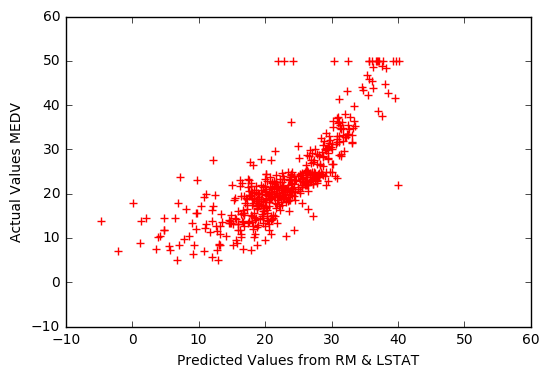

MSE: 2433.53993314


In [34]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM & LSTAT")
plt.ylabel("Actual Values MEDV")
plt.xlim(-10,60)
plt.ylim(-10,60)
plt.show()
print "MSE:", model.mse_model

In [35]:
y, x = patsy.dmatrices("MEDV ~ AGE + CHAS", data=df)
age_chas_model = sm.OLS(y, x).fit()
predictions = age_chas_model.predict(x)

age_chas_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     57.33
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           3.73e-23
Time:                        16:15:06   Log-Likelihood:                -1788.3
No. Observations:                 506   AIC:                             3583.
Df Residuals:                     503   BIC:                             3595.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     30.8601      0.975     31.662      0.000        28.945    32.775
AGE           -0.1291      0.013     -9.782      0.000        -0.155    -0.103
CHAS           7.5838      1.462      5.186      0.000         4.711    10.457
==============================================================================
Omnibus:                      161.230   Durbin-Watson:                   0.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.990
Skew:                           1.612   Prob(JB):                     4.20e-89
Kurtosis:                       5.984   Cond. No.                         293.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

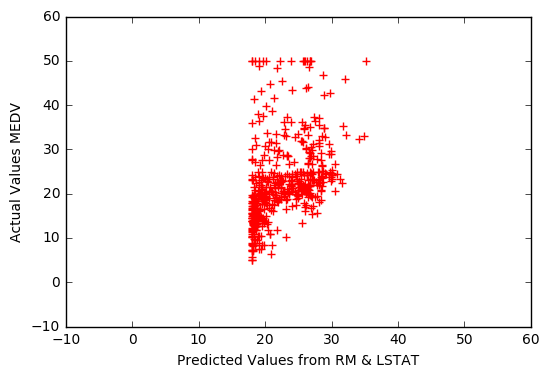

MSE: 2433.53993314


In [36]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM & LSTAT")
plt.ylabel("Actual Values MEDV")
plt.xlim(-10,60)
plt.ylim(-10,60)
plt.show()
print "MSE:", model.mse_model

In [78]:
from itertools import combinations
combos2 = list(combinations(list(df.columns[:-1]),2))
combos3 = list(combinations(list(df.columns[:-1]),3))

In [83]:
lst= []
for i in range(len(combos2)):
    string = 'MEDV ~ ' + combos2[i][0] + ' + ' + combos2[i][1]
    y, x = patsy.dmatrices(string, data=df)
    model = sm.OLS(y, x).fit()
    lst.append([combos2[i][0], combos2[i][1], model.mse_model])
pd.DataFrame(lst, columns=['x1', 'x2', 'MSE']).sort_values('MSE', ascending=False)

,x1,x2,MSE
56,RM,LSTAT,13638.493107
76,PTRATIO,LSTAT,12957.018882
41,CHAS,LSTAT,12015.117206
67,DIS,LSTAT,12008.157758
54,RM,PTRATIO,11987.334345
53,RM,TAX,11972.607382
62,AGE,LSTAT,11774.083403
74,TAX,LSTAT,11759.159151
77,B,LSTAT,11721.131630
22,ZN,LSTAT,11702.118513


In [84]:
lst= []
for i in range(len(combos3)):
    string = 'MEDV ~ ' + combos3[i][0] + ' + ' + combos3[i][1]  + ' + ' + combos3[i][2]
    y, x = patsy.dmatrices(string, data=df)
    model = sm.OLS(y, x).fit()
    lst.append([combos3[i][0], combos3[i][1], combos3[i][2], model.mse_model])
pd.DataFrame(lst, columns=['x1', 'x2', 'x3', 'MSE']).sort_values('MSE', ascending=False)

,x1,x2,x3,MSE
249,RM,PTRATIO,LSTAT,9662.770034
180,CHAS,RM,LSTAT,9275.171656
250,RM,B,LSTAT,9263.097550
247,RM,TAX,LSTAT,9234.049456
240,RM,DIS,LSTAT,9209.379049
44,CRIM,RM,LSTAT,9192.825043
244,RM,RAD,LSTAT,9152.479723
144,INDUS,RM,LSTAT,9112.691695
99,ZN,RM,LSTAT,9111.180817
235,RM,AGE,LSTAT,9099.056781
